In [32]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
C22F002 = pd.read_csv('C22F002.csv')
C22F002


,time(s),liquid holdup
0,0.1,0.267684
1,0.2,0.387966
2,0.3,0.744619
3,0.4,0.777399
4,0.5,0.575393
...,...,...
881,88.2,0.125161
882,88.3,0.152851
883,88.4,0.272115
884,88.5,0.376441


In [86]:
def spectrum1(h, dt=1):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    return freqs, psraw, psdraw

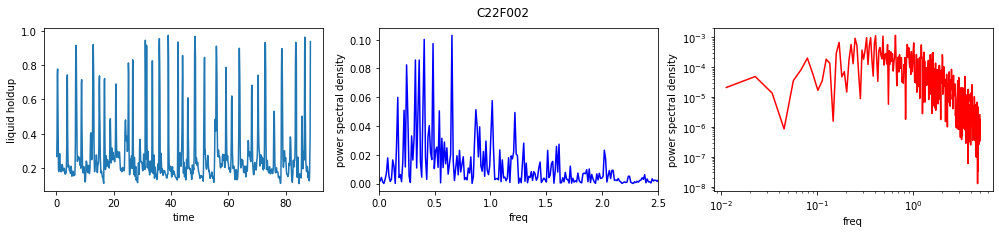

In [99]:
#C22F002.plot(x='time(s)')

fig_C22F002, data = plt.subplots(1, 3, figsize=(17, 3))

fig_C22F002.suptitle('C22F002')
data[0].set_xlabel('time ()')
data[0].set_ylabel('liquid holdup')
data[1].set_xlabel('freq (Hz)')
data[1].set_ylabel('power spectral density')
data[1].set_xlim([0,2.5])
data[2].set_xlabel('freq')
data[2].set_ylabel('power spectral density')

freqs, ps, psd = spectrum1(C22F002[C22F002.columns[1]], dt=0.1)

data[0].plot(C22F002[C22F002.columns[0]],C22F002[C22F002.columns[1]])
#data[1].loglog(freqs,psd,'r',freqs,ps,'b')
data[1].plot(freqs,psd,'b')
data[2].loglog(freqs,ps,'r')

